In [199]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [200]:
books=pd.read_csv('data/Books.csv')
users=pd.read_csv('data/Users.csv')
ratings=pd.read_csv('data/Ratings.csv')

C:\Users\adminn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [201]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [202]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [203]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [204]:
print('shape of books data is {}'.format(books.shape))
print('shape of users data is {}'.format(users.shape))
print('shape of ratings data is {}'.format(ratings.shape))


shape of books data is (271360, 8)
shape of users data is (278858, 3)
shape of ratings data is (1149780, 3)


## Missing values

In [205]:
def missing_values(df):
    miss_total=df.isnull().sum().sort_values(ascending=False)
    miss_percent=(df.isnull().sum()/len(df)).sort_values(ascending=False)
    missing_data=pd.concat([miss_total,miss_percent],keys=['total_miss_val','percent_miss_val'],axis=1)
    return missing_data

In [206]:
missing_books=missing_values(books)
missing_books

,total_miss_val,percent_miss_val
Image-URL-L,3,0.000011
Publisher,2,0.000007
Book-Author,1,0.000004
ISBN,0,0.000000
Book-Title,0,0.000000
Year-Of-Publication,0,0.000000
Image-URL-S,0,0.000000
Image-URL-M,0,0.000000


In [207]:
missing_users=missing_values(users)
missing_users

,total_miss_val,percent_miss_val
Age,110762,0.397199
User-ID,0,0.000000
Location,0,0.000000


In [208]:
missing_ratings=missing_values(ratings)
missing_ratings

,total_miss_val,percent_miss_val
User-ID,0,0.0
ISBN,0,0.0
Book-Rating,0,0.0


# EDA

In [209]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [210]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [211]:
books['Year-Of-Publication'].unique()
# first remark is that we have some name of publisher in our column of year publication.

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [212]:
books[books['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [213]:
books.loc[books.ISBN=='0789466953','Year-Of-Publication']=2000
books.loc[books.ISBN=='0789466953','Book-Author']='James Buckley'
books.loc[books.ISBN=='0789466953','Year-Of-Publication']=2000
books.loc[books.ISBN=='0789466953','Publisher']='DK Publishing Inc'
books.loc[books.ISBN=='0789466953','Book-Title']="DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"


books.loc[books.ISBN=='078946697X','Year-Of-Publication']=2000
books.loc[books.ISBN=='078946697X','Book-Author']='Michael Teitelbaum'
books.loc[books.ISBN=='078946697X','Publisher']='DK Publishing Inc'
books.loc[books.ISBN=='078946697X','Book-Title']='DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'



In [214]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [215]:
books[books['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [216]:
books.loc[books.ISBN=='2070426769	','Year-Of-Publication']=2003
books.loc[books.ISBN=='2070426769	','Book-Author']='Jean-Marie Gustave'
books.loc[books.ISBN=='2070426769	','Publisher']='Gallimard'
books.loc[books.ISBN=='2070426769	','Book-Title']='Peuple du ciel, suivi de Les Bergers'



In [217]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'],errors='coerce')


In [218]:
books['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,    0., 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 2030., 1911., 1904., 1949., 1932.,
       1928., 1929., 1927., 1931., 1914., 2050., 1934., 1910., 1933.,
       1902., 1924., 1921., 1900., 2038., 2026., 1944., 1917., 1901.,
       2010., 1908., 1906., 1935., 1806., 2021., 2012., 2006.,   nan,
       1909., 2008., 1378., 1919., 1922., 1897., 2024., 1376., 2037.])

### Remarks :

- Since our data was published in 2004, we assume that years after 2006 are invalid
- We will sit invalid data as NaN


In [219]:
books['Year-Of-Publication'].isnull().sum()

1

In [220]:
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

In [221]:
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()),inplace=True)

In [222]:
books['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984., 1968., 1961., 1958., 1974., 1976., 1971., 1977., 1975.,
       1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966., 1920.,
       1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969., 1954.,
       1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946., 1936.,
       1930., 1925., 1948., 1943., 1947., 1945., 1923., 1939., 1926.,
       1938., 1911., 1904., 1949., 1932., 1928., 1929., 1927., 1931.,
       1914., 1934., 1910., 1933., 1902., 1924., 1921., 1900., 1944.,
       1917., 1901., 1908., 1906., 1935., 1806., 2006., 1909., 1378.,
       1919., 1922., 1897., 1376.])

In [223]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype(np.int32)

Text(0.5, 1.0, 'Year of Publication')

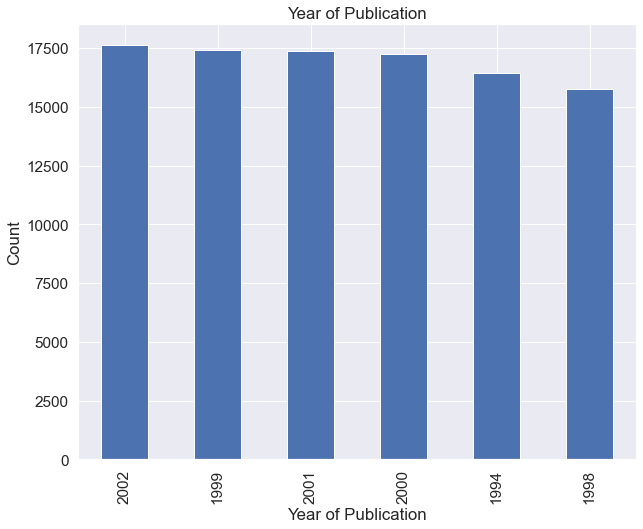

In [224]:
sns.set(font_scale=1.4)

books['Year-Of-Publication'].value_counts()[:6].plot(kind='bar',figsize=(10,8),
                                                  xlabel='Year of Publication',
                                                  ylabel='Count')
plt.title('Year of Publication')

### Publisher column

In [225]:
books.loc[books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [226]:
books.loc[(books.ISBN == '193169656X'),'Publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'Publisher'] = 'other'

Text(0.5, 1.0, 'Publisher')

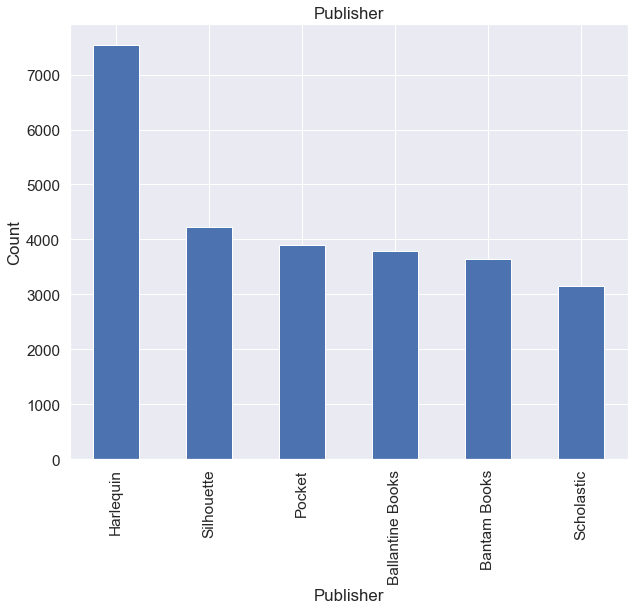

In [227]:
sns.set(font_scale= 1.4)
books['Publisher'].value_counts()[:6].plot(kind='bar', figsize=(10,8), 
                                                      xlabel='Publisher', 
                                                      ylabel='Count')

plt.title("Publisher")

### Users

In [228]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


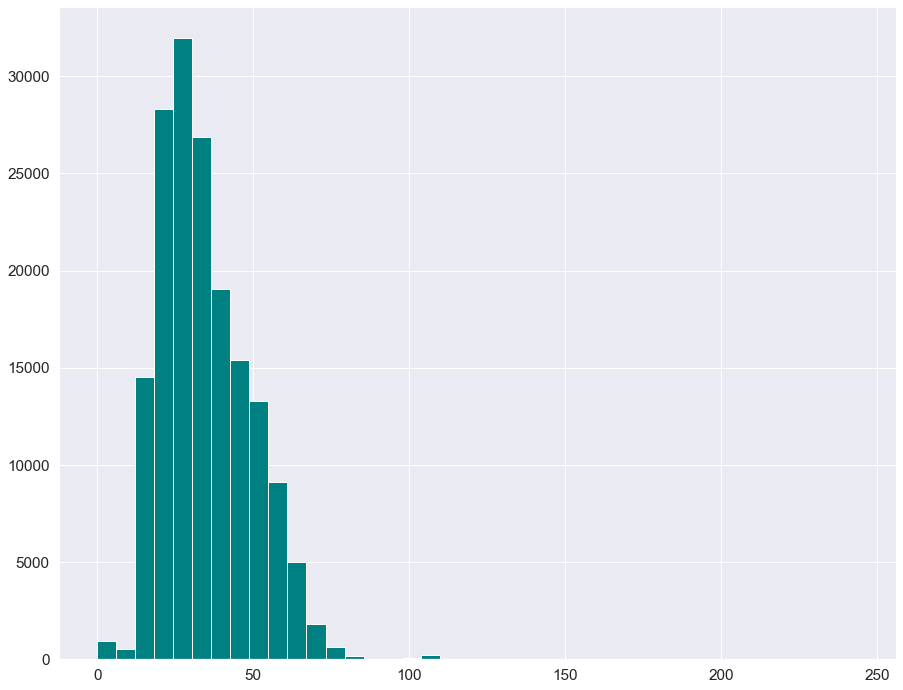

In [229]:
plt.figure(figsize=(15,12))
users.Age.hist(bins=40, color='teal')
plt.show()

## Remarks : 

- I think we should remove values below 5 and above 90 because i don't make much sens

In [230]:
users.loc[(users.Age>90) | (users.Age<5),'Age']=np.NaN

users.Age=users.Age.fillna(users.Age.mean())

users.Age=users.Age.astype(np.int32)

# Popularity Recommandation system 

In [232]:
ratings_name=ratings.merge(books,on='ISBN')
ratings_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [236]:
num_rating_df=ratings_name.groupby('Book-Title').count()[['Book-Rating']]
num_rating_df.rename(columns={'Book-Rating':'num_rating'},inplace=True)
num_rating_df

,num_rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
Always Have Popsicles,1
Apple Magic (The Collector's series),1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1
...,...
Ã?Â?lpiraten.,2
Ã?Â?rger mit Produkt X. Roman.,4
Ã?Â?sterlich leben.,1


In [237]:
avg_rating_df=ratings_name.groupby('Book-Title').mean()[['Book-Rating']]
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,avg_rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.250000
Always Have Popsicles,0.000000
Apple Magic (The Collector's series),0.000000
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.000000
...,...
Ã?Â?lpiraten.,0.000000
Ã?Â?rger mit Produkt X. Roman.,5.250000
Ã?Â?sterlich leben.,7.000000


In [239]:
popular_df=num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,num_rating,avg_rating
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.250000
Always Have Popsicles,1,0.000000
Apple Magic (The Collector's series),1,0.000000
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.000000
...,...,...
Ã?Â?lpiraten.,2,0.000000
Ã?Â?rger mit Produkt X. Roman.,4,5.250000
Ã?Â?sterlich leben.,1,7.000000


In [248]:
popular_df=popular_df[popular_df['num_rating']>=250].sort_values('avg_rating',ascending=False).head(50)

In [253]:
popular_df=popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_rating','avg_rating','Image-URL-S']]

# Collaborative Filterning Recommender System

In [262]:
x=ratings_name.groupby('User-ID').count()['Book-Rating'] >200
fil_users=x[x].index
filtred_rating=ratings_name[ratings_name['User-ID'].isin(fil_users)]
filtred_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [268]:
y=filtred_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books=y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [270]:
final_ratings=filtred_rating[filtred_rating['Book-Title'].isin(famous_books)]

In [275]:
final_ratings.drop_duplicates()
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [276]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [277]:
pt.fillna(0,inplace=True)